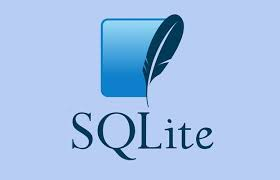

# Exploratory Data Analysis with SQL

This notebook uses the 120 years of Olympics History dataset from Kaggle.

For the purpose of practice of SQL syntax the 1% of the dataset was sampled and loaded into a <b>SQLITE database</b> file. Hence, the database table, **`athletes`**, has just 2169 rows unlike the original dataset.

#### List of Questions

- How many olympics games have been held?
- List down all Olympics games held so far.
- Mention the total no of nations who participated in each olympics game?
- Which year saw the highest and lowest no of countries participating in olympics?
- Which nation has participated in all of the olympic games?
- Identify the sport which was played in all summer olympics.
- Which Sports were just played only once in the olympics?
- Fetch the total no of sports played in each olympic games.
- Fetch details of the oldest athletes to win a gold medal.
- Find the Ratio of male and female athletes participated in all olympic games.


# Connect to SQLite DB

In [ ]:
# !pip install sqlalchemy
# !pip install ipython-sql

In [1]:
%load_ext sql

In [2]:
import csv, sqlite3

In [3]:
con = sqlite3.connect("athletes.db")
cur = con.cursor()

In [4]:
%sql sqlite:///athletes.db

In [54]:
%%sql
PRAGMA TABLE_INFO(athletes);

 * sqlite:///athletes.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ID,INTEGER,0,None,0
1,Name,TEXT,0,None,0
2,Sex,TEXT,0,None,0
3,Age,REAL,0,None,0
4,Height,REAL,0,None,0
5,Weight,REAL,0,None,0
6,Team,TEXT,0,None,0
7,NOC,TEXT,0,None,0
8,Games,TEXT,0,None,0
9,Year,INTEGER,0,None,0


In [12]:
%%sql

SELECT * FROM athletes LIMIT 3;

 * sqlite:///athletes.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
11592,Aranka Binder,F,26.0,163.0,47.0,Individual Olympic Athletes,IOA,1992 Summer,1992,Summer,Barcelona,Shooting,"Shooting Women's Air Rifle, 10 metres",Bronze
26774,Frederik Albert De Waele,M,33.0,None,None,Belgium,BEL,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Parallel Bars,None
132574,Yang Yun,F,15.0,158.0,40.0,China,CHN,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Individual All-Around,None


#### 1. How many olympics games have been held?

In [5]:
%%sql

SELECT COUNT(DISTINCT Games) AS Num_of_Games FROM athletes;

 * sqlite:///athletes.db
Done.


Num_of_Games
51


#### 2. List down all Olympics games held so far.

In [8]:
%%sql

SELECT DISTINCT Games FROM athletes;

 * sqlite:///athletes.db
Done.


Games
1992 Summer
1952 Summer
2000 Summer
1964 Summer
1996 Summer
1932 Summer
1980 Summer
2004 Summer
1976 Summer
1924 Summer


In [11]:
%%sql

SELECT DISTINCT Games FROM athletes ORDER BY Year LIMIT 5;

 * sqlite:///athletes.db
Done.


Games
1896 Summer
1900 Summer
1904 Summer
1906 Summer
1908 Summer


#### 3. Mention the total no of nations who participated in each olympics game?

In [16]:
%%sql

SELECT DISTINCT Team FROM athletes;

 * sqlite:///athletes.db
Done.


Team
Individual Olympic Athletes
Belgium
China
Poland
Switzerland
Slovenia
United States
East Germany
Great Britain
Netherlands


In [15]:
%%sql

SELECT COUNT(DISTINCT Team) FROM athletes;

 * sqlite:///athletes.db
Done.


COUNT(DISTINCT Team)
215


In [23]:
%%sql

SELECT Games, COUNT(DISTINCT Team)
AS Num_of_Nations
From athletes
GROUP BY Games LIMIT 5;

 * sqlite:///athletes.db
Done.


Games,Num_of_Nations
1896 Summer,3
1900 Summer,10
1904 Summer,3
1906 Summer,8
1908 Summer,13


#### 4. Which year saw the highest and lowest no of countries participating in olympics?

In [39]:
%%sql

SELECT Year, COUNT(DISTINCT Team) AS Total_Num_Countries
FROM athletes
GROUP BY Year
ORDER BY Total_Num_Countries DESC
Limit 1;

 * sqlite:///athletes.db
Done.


Year,Total_Num_Countries
2016,64


In [40]:
%%sql

SELECT Year, COUNT(DISTINCT Team) AS Total_Num_Countries
FROM athletes
GROUP BY Year
ORDER BY Total_Num_Countries
Limit 1;

 * sqlite:///athletes.db
Done.


Year,Total_Num_Countries
1896,3


In [42]:
%%sql

SELECT MIN(Num_of_Nations), Year
FROM
    (SELECT Year, COUNT(DISTINCT Team) AS Num_of_Nations
    FROM athletes
    GROUP BY Year);

 * sqlite:///athletes.db
Done.


MIN(Num_of_Nations),Year
3,1896


In [43]:
%%sql

SELECT MAX(Num_of_Nations), Year
FROM
    (SELECT Year, COUNT(DISTINCT Team) AS Num_of_Nations
    FROM athletes
    GROUP BY Year);

 * sqlite:///athletes.db
Done.


MAX(Num_of_Nations),Year
64,2016


#### 5. Fetch the total no of sports played in each olympic games.

In [46]:
%%sql

SELECT Year, COUNT(Games) AS Games_Played
FROM athletes
GROUP BY Games;

 * sqlite:///athletes.db
Done.


Year,Games_Played
1896,3
1900,13
1904,14
1906,10
1908,25
1912,28
1920,35
1924,45
1924,3
1928,46


#### 6. Fetch details of the oldest athletes to win a gold medal.

In [49]:
%%sql

SELECT * 
FROM athletes
WHERE Medal = "Gold"
ORDER BY Age DESC
LIMIT 1;

 * sqlite:///athletes.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
57371,Franz Kapus,M,46.0,188.0,92.0,Switzerland-1,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Bobsleigh,Bobsleigh Men's Four,Gold


In [51]:
%%sql

SELECT *
FROM (SELECT * FROM athletes WHERE Medal = "Gold")
ORDER BY Age DESC
LIMIT 1;

 * sqlite:///athletes.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
57371,Franz Kapus,M,46.0,188.0,92.0,Switzerland-1,SUI,1956 Winter,1956,Winter,Cortina d'Ampezzo,Bobsleigh,Bobsleigh Men's Four,Gold


#### 7. Find the Ratio of male and female athletes participated in all olympic games.

In [52]:
%%sql

SELECT Sex, COUNT(*) AS Count_of_Athletes
FROM athletes
GROUP BY SEX;

 * sqlite:///athletes.db
Done.


Sex,Count_of_Athletes
F,657
M,1512


#### 8. How many Gold medals were won during Summer and Winter seasons?

In [55]:
%%sql

SELECT Season, COUNT(*) AS Gold_Medals
FROM athletes
WHERE Medal = "Gold"
GROUP BY Season
;

 * sqlite:///athletes.db
Done.


Season,Gold_Medals
Summer,90
Winter,14


#### 9. What is the age of the heaviest athlete?

In [56]:
%%sql

SELECT Age, Name, MAX(Weight)
FROM athletes;

 * sqlite:///athletes.db
Done.


Age,Name,MAX(Weight)
25.0,Petr Pavlsek,161.0


In [59]:
%%sql

SELECT *
FROM athletes
WHERE Weight = (SELECT MAX(Weight) FROM athletes)
;

 * sqlite:///athletes.db
Done.


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
92288,Petr Pavlsek,M,25.0,187.0,161.0,Czechoslovakia,TCH,1972 Summer,1972,Summer,Munich,Weightlifting,Weightlifting Men's Super-Heavyweight,None


#### 10. What team won the most Gold medals?

In [78]:
%%sql

SELECT Team, COUNT(Medal) AS Gold_Medals
FROM athletes
WHERE Medal = "Gold"
GROUP BY Team
ORDER BY Gold_Medals DESC;

 * sqlite:///athletes.db
Done.


Team,Gold_Medals
United States,7
Soviet Union,6
Sweden,5
Russia,5
Italy,5
France,5
South Korea,4
Norway,4
Great Britain,4
Germany,4


<div class="alert alert-block alert-danger">
    <h1>CLOSE DB CONNECTION!!!</h1>
    This is to avoid losing data in the database. Therefore, always close the connection.
</div>

In [79]:
con.close()

#### Contributors by:
- Sochima Obodozie
- Izunna Dan-Ekeh